#### Import Dependencies

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#### Set Path Directories

In [71]:
drawings_dir = os.path.join(r'C:\Users\17203\Desktop\CNN\data\train\drawings')
engravings_dir = os.path.join(r'C:\Users\17203\Desktop\CNN\data\train\engraving')
iconography_dir = os.path.join(r'C:\Users\17203\Desktop\CNN\data\train\iconography')
painting_dir = os.path.join(r'C:\Users\17203\Desktop\CNN\data\train\painting')
sculpture_dir = os.path.join(r'C:\Users\17203\Desktop\CNN\data\train\sculpture')

#### Check Total Number of Images in Each Directory

In [72]:
print('total drawing images:', len(os.listdir(drawings_dir)))
print('total engraving images:', len(os.listdir(engravings_dir)))
print('total iconography images:', len(os.listdir(iconography_dir)))
print('total painting images:', len(os.listdir(painting_dir)))
print('total sculpture images:', len(os.listdir(sculpture_dir)))

total drawing images: 1107
total engraving images: 757
total iconography images: 2077
total painting images: 2042
total sculpture images: 1738


#### Set the Batch Size for Image Processing

In [73]:
batch_size = 128

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Set the Classes and Use Flow_From_Directory to parse through all folders in primary data folder

In [86]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\17203\Desktop\CNN\data\train', 
        target_size=(200, 200), 
        batch_size=batch_size,
        classes = ['drawings','engraving','iconography','painting','sculpture'],
        class_mode='categorical')

Found 7721 images belonging to 5 classes.


In [5]:
import tensorflow as tf

#### Build Sequential model with Four Convolution Layers

In [77]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(5, activation='softmax')
])

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 21, 21, 64)       

In [79]:
from tensorflow.keras.optimizers import RMSprop

#### Use RMSprop optimizer which is recommended for recurrent neural networks

In [80]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [81]:
total_sample=train_generator.n

#### Set the Number of Epochs

In [82]:
n_epochs = 30

In [83]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=int(total_sample/batch_size),
    epochs=n_epochs,
    verbose=1)

Epoch 1/30
45/60 [=====================>........] - ETA: 46s - loss: 1.3490 - acc: 0.4313

C:\Users\17203\Anaconda3\envs\DVG\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


60/60 [==============================] - 183s 3s/step - loss: 1.2871 - acc: 0.4664
Epoch 2/30
60/60 [==============================] - 185s 3s/step - loss: 0.9462 - acc: 0.6231
Epoch 3/30
60/60 [==============================] - 185s 3s/step - loss: 0.8178 - acc: 0.6954
Epoch 4/30
60/60 [==============================] - 187s 3s/step - loss: 0.7413 - acc: 0.7237
Epoch 5/30
60/60 [==============================] - 182s 3s/step - loss: 0.6734 - acc: 0.7545
Epoch 6/30
60/60 [==============================] - 184s 3s/step - loss: 0.6166 - acc: 0.7724
Epoch 7/30
60/60 [==============================] - 177s 3s/step - loss: 0.5750 - acc: 0.7909
Epoch 8/30
60/60 [==============================] - 172s 3s/step - loss: 0.5534 - acc: 0.7960
Epoch 9/30
60/60 [==============================] - 167s 3s/step - loss: 0.4992 - acc: 0.8183
Epoch 10/30
60/60 [==============================] - 159s 3s/step - loss: 0.4581 - acc: 0.8266
Epoch 11/30
60/60 [==============================] - 179s 3s/step - lo

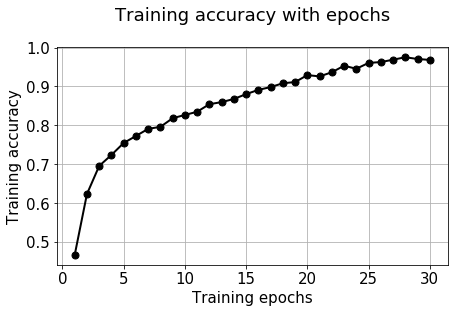

In [87]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=7)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

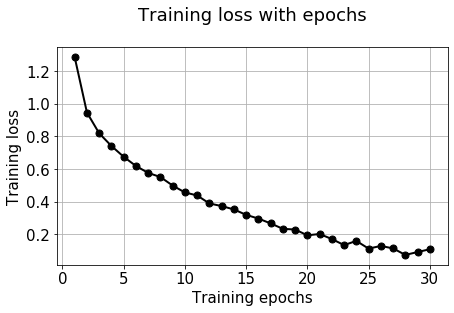

In [88]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=7)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Function to Test on Various Training Sets

In [4]:
nouveau_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Art Nouveau (Modern)')
baroque_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Baroque')
expressionsim_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Expressionism')
impressionsim_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Impressionism')
post_impressionism_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Post-Impressionism')
realism_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Realism')
romanticism_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Romanticism')
surrealism_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Surrealism')
symbolism_dir = os.path.join(r'C:\Users\17203\Desktop\art-snobs-data3\trainset\Symbolism')

In [5]:
print('total nouveau images:', len(os.listdir(nouveau_dir)))
print('total baroque images:', len(os.listdir(baroque_dir)))
print('total expressionsim images:', len(os.listdir(expressionsim_dir)))
print('total impressionsim images:', len(os.listdir(impressionsim_dir)))
print('total post_impressionism images:', len(os.listdir(post_impressionism_dir)))
print('total realism images:', len(os.listdir(realism_dir)))
print('total romanticism images:', len(os.listdir(romanticism_dir)))
print('total surrealism images:', len(os.listdir(surrealism_dir)))
print('total symbolism images:', len(os.listdir(symbolism_dir)))

total nouveau images: 2358
total baroque images: 2362
total expressionsim images: 2360
total impressionsim images: 2358
total post_impressionism images: 2362
total realism images: 2362
total romanticism images: 2358
total surrealism images: 2364
total symbolism images: 2363


In [6]:
def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=9,verbose=0):

    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop
    
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(
            train_directory,  
            target_size=target_size,  
            batch_size=batch_size,
            classes = classes,
            class_mode='categorical')
    
    input_shape = tuple(list(target_size)+[3])
    

    model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    

    total_sample=train_generator.n
    

    model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs,
        verbose=verbose)
    
    return model

In [7]:
train_directory = r"C:\Users\17203\Desktop\art-snobs-data3\trainset"

In [8]:
CNN_model = train_CNN(train_directory=train_directory,classes=['Art Nouveau (Modern)','Baroque','Expressionism','Impressionism','Post-Impressionism','Realism','Romanticism','Surrealism','Symbolism'],
                        num_epochs=30,num_classes=9,verbose=1)

Found 21247 images belonging to 9 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/30
123/165 [=====================>........] - ETA: 3:52 - loss: 2.1650 - acc: 0.1650

C:\Users\17203\Anaconda3\envs\DVG\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (95799284 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


165/165 [==============================] - 921s 6s/step - loss: 2.1440 - acc: 0.1751
Epoch 2/30
165/165 [==============================] - 919s 6s/step - loss: 2.0244 - acc: 0.2358
Epoch 3/30
165/165 [==============================] - 921s 6s/step - loss: 1.9382 - acc: 0.2754
Epoch 4/30
165/165 [==============================] - 922s 6s/step - loss: 1.8646 - acc: 0.3081
Epoch 5/30
165/165 [==============================] - 921s 6s/step - loss: 1.7973 - acc: 0.3359
Epoch 6/30
165/165 [==============================] - 913s 6s/step - loss: 1.7308 - acc: 0.3648
Epoch 7/30
165/165 [==============================] - 919s 6s/step - loss: 1.6670 - acc: 0.3909
Epoch 8/30
165/165 [==============================] - 917s 6s/step - loss: 1.5921 - acc: 0.4221
Epoch 9/30
165/165 [==============================] - 913s 6s/step - loss: 1.5117 - acc: 0.4531
Epoch 10/30
165/165 [==============================] - 920s 6s/step - loss: 1.4108 - acc: 0.4946
Epoch 11/30
165/165 [=============================

In [9]:
CNN_model.save('CNN_model.h5')